## 1. Markov Process
- 马尔科夫性：即t时刻的状态只取决于上一时刻t-1的状态，与再之前的状态独立/无关，即$$p(s_{t+1}|s_t)=p(s_{t+1}|h_t)$$
- 前后两个时刻，不同状态之间的转移概率$p(s_{t+1}=s'|s_{t}=s)$可以组成状态转移矩阵P，每个值都是一个条件概率
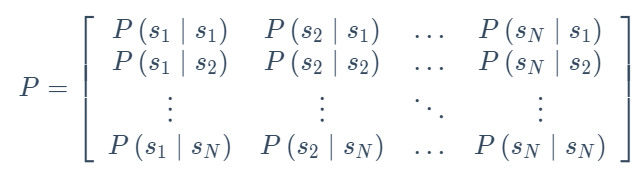
- 根据状态转移矩阵or对应的状态转移图采样，得到的状态序列为markov chain
- 若实际数据不满足makov property，即下一个状态与只爱去年的状态有关，可以用RNN对历史信息建模，获得历史信息的状态表征，最终在表征状态空间求解MDP

## 2. Markov Reward Process
- 相比MP多了
    - 奖励函数R，输入是状态，输出是奖励，
    - 折扣因子$\gamma$，对未来的奖励打折，原因：
        - 若MP带环，则状态序列可以无穷长，折扣可以使得奖励不会到无穷大
        - 对未来的评估不一定准确，因此打折以考虑不确定性
        - 实际上，人更注重即时奖励
        - 可以作为超参调节
- 回报Return：未来所有奖励的叠加$$G_t=R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+...+\gamma^{T-t-1}R_T$$
- 价值Value：在MRP中只有一种价值函数，即状态价值函数 
$$V_t(s)=E[G_t|s_t=s]$$

### 2.1 V函数的贝尔曼方程
- 贝尔曼方程Bellman equation，定义了当前状态跟未来状态之间的价值**迭代**关系，根据价值函数推导如下：
$$V_t(s)=E[G_t|s_t=s]\\
=E[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}...|s_t=s]
\\=E[R_{t+1}]+\gamma E[R_{t+2}+\gamma^2 R_{t+3}+...|s_t=s]
\\=R(s)+\gamma E[G_{t+1}|s_t=s]
\\=R(s)+\gamma E[V_{t+1}(s_{t+1})|s_t=s]
\\=R(s)+\gamma \sum_{s' \in S}P(s'|s)V(s')$$

### 2.2 求解贝尔曼方程，也即求解价值函数

1. 解析解：写成矩阵形式如下，可以直接推出V的解析解如下，但考虑到矩阵求逆的复杂度是O(N^3)，因此状态非常多的时候不适用
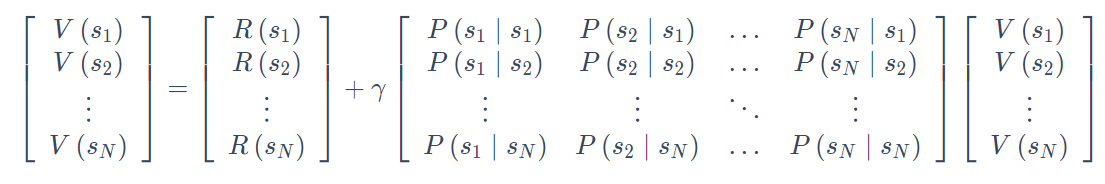
$$V=R+\gamma PV\\(I-\gamma P)V=R\\V=(I-\gamma P)^{-1}R$$
2. 迭代法
- 动态规划DP，迭代贝尔曼方程，当两次更新差值低于阈值停止，输出最新的V作为价值函数的收敛值。
    - 这里运用了bootstrap的思想，因为当前状态价值的估计是基于后续的**估计值**（而不是采样值）
- 蒙特卡洛MC，如从状态s4开始采样生成多条轨迹，对每条轨迹都计算回报G，平均后得到s4的价值，根据大数定律，均值即为状态s4的价值
- 时序差分TD，结合了DP和MC

## 3. Markov Decision Process
- 相比MRP多了
    - 动作：a
    - 策略：$\pi(a|s)=P(a_t=a|s_t=s)$
    - 转移概率多了条件a：$P(s_{t+1}=s'|s_t=s,a_t=a)$，若已知策略，可以marginalize掉条件中的a：$$P^{\pi}(s'|s)=\sum_{a \in A} \pi (a|s)P(s'|s,a)$$
    - 价值函数多了条件a：$R(s_t=a,a_t=a)=E[r_t|s_t=s,a_t=a]$，同理可以marginalize掉条件中的a：$$R^\pi (s)=\sum_{a \in A} \pi (a|s)R(s,a)$$
- 如图为MRP何MDP的差异
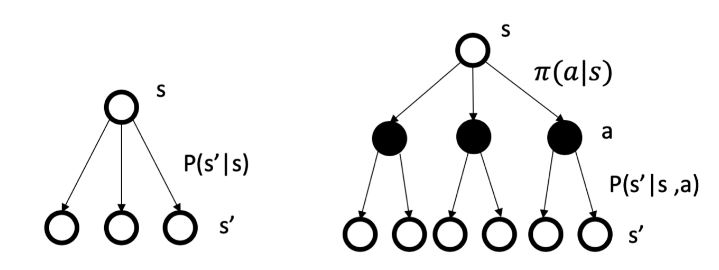
- 价值函数，相比MRP的状态价值函数V，由于动作的引入，MDP多了一个动作价值函数Q
    - 状态价值函数V：$v^\pi(s)=E_\pi [G_t|s_t=s]$
    - 动作价值函数Q：$q^\pi(s,a)=E_\pi [G_t|s_t=s,a_t=a]$
    - 两者关系：$v^\pi (s)=\sum_{a \in A} \pi(a|s)q^\pi(s,a)$，即对Q函数的动作进行marginalize得到V
    
### 3.1 Q函数的贝尔曼方程
$$q(s,a)=E[G_t|s_t=s,a_t=a]\\
=E[R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}|s_t=s,a_t=a]\\
=E[R_{t+1}|s_t=s,a_t=a]+\gamma E[R_{t+2}+\gamma R_{t+3}+\gamma^2 R_{t+4}]\\
=R(s,a)+\gamma E[G_{t+1}|s_t=s,a_t=a]\\
=R(s,a)+\gamma E[V(s_{t+1})|s_t=s,a_t=a]\\
=R(s,a)+\gamma \sum_{s' \in S}P(s'|s,a)V(s')$$
### 3.2 贝尔曼期望方程
- 用前后两个时刻的价值**期望**的关系表示贝尔曼方程
    $$v^\pi(s)=E_\pi[R_{t+1}+\gamma v^\pi(s_{t+1})|s_t=s]$$
    $$q^\pi(s,a)=E_\pi[R_{t+1}+\gamma q^\pi (s_{t+1},A_{t+1})|s_t=s,a_t=a]$$
- 带入两种贝尔曼方程的关系$v^\pi (s)=\sum_{a \in A} \pi(a|s)q^\pi(s,a)$，得到另外一种形式的贝尔曼期望方程
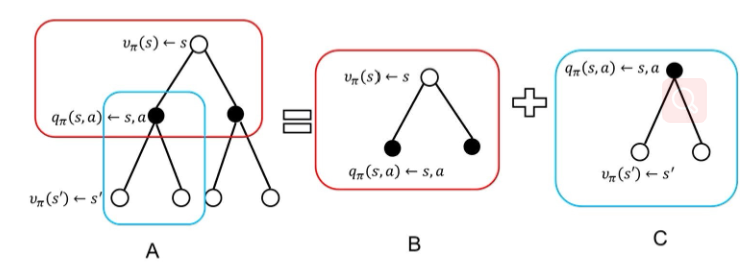
    - B: $\color{red}{v^\pi (s)=\sum_{a \in A} \pi(a|s)q^\pi(s,a)}$
    - C: $\color{blue}{q^\pi(s,a)=R(s,a)+\gamma \sum_{s' \in S}P(s'|s,a)V^\pi(s')}$
    - A: $v^\pi(s)=\sum_{a \in A}{\pi(a|s)}[R(s,a)+\gamma \sum_{s' \in S}P(s'|s,a)v^\pi(s')]$
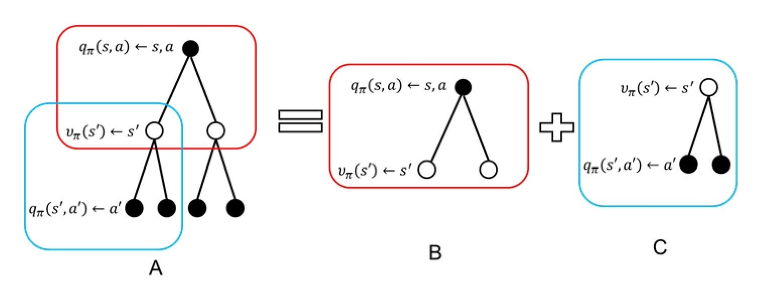
    - B: $\color{red}{q^\pi(s,a)=R(s,a)+\gamma \sum_{s' \in S}P(s'|s,a)V^\pi(s')}$
    - C: $\color{blue}{v^\pi(s')=\sum_{a' \in A}\pi(a'|s')q^\pi(s',a')}$
    - A: $q^\pi(s,a)=R(s,a)+\gamma \sum_{s' \in SP(s'|s,a)}\sum_{a' \in A} \pi(a'|s')q^\pi(s',a')$
- 用backup diagram理解贝尔曼方程
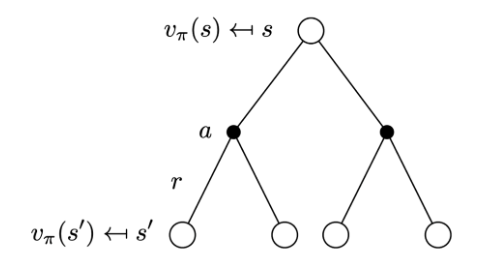

## 4. 如何找到最优策略$\pi$
- agent目标：找到最优策略，使得总奖励最大
- 可以通过不断地评估策略（预测问题），改进策略（控制问题），迭代得到最优策略
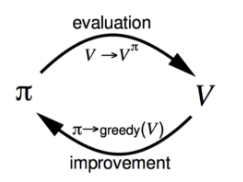
- 在MDP中，由于已知环境（包括状态转移概率和奖励），prediction和control都可以通过动态规划解决
    - **注意：动态规划解决的是规划问题，不是学习问题（此处学习特指对环境的学习）**

### 4.1 预测问题prediction
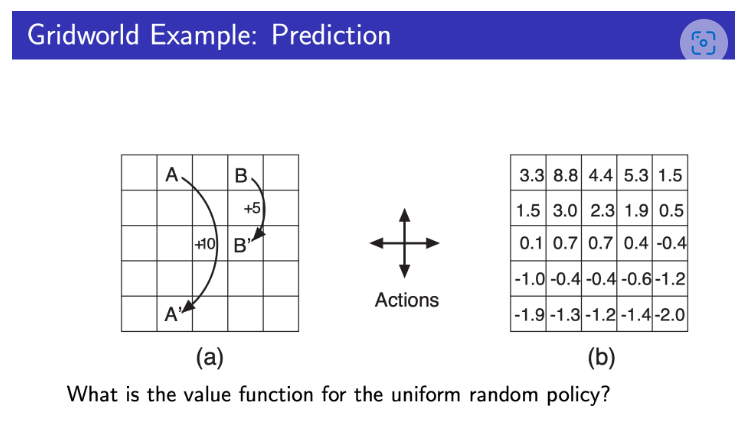
- 输入：MDP<$S,A,P,R,γ$>和策略$π$
- 输出：价值函数$v^\pi$
- 求解：对贝尔曼**期望**方程不断迭代，直到收敛
$$v^\pi(s)=\sum_{a \in A}{\pi(a|s)}[R(s,a)+\gamma \sum_{s' \in S}P(s'|s,a)v^\pi(s')]$$
    - 由于给定了policy，可以去掉a（上角标加π），简化为MRP的表达形式
$$v_{t+1}(s)=R^\pi(s)+\gamma \sum_{s' \in S}P^\pi(s'|s)V(s')$$
    - 同步备份：每次迭代都更新所有状态
    - 异步备份：每次迭代只更新部分状态


### 4.2 控制问题control
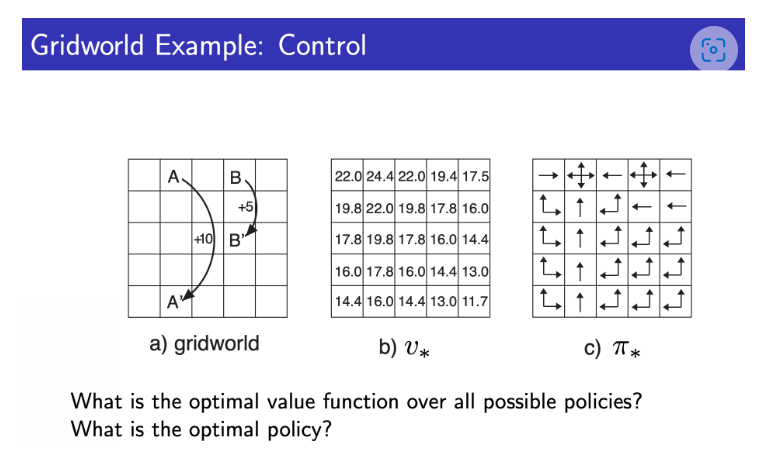
- 输入：MDP<$S,A,P,R,γ$>
- 输出：最优价值函数$v^\star$和最优策略$\pi^\star$
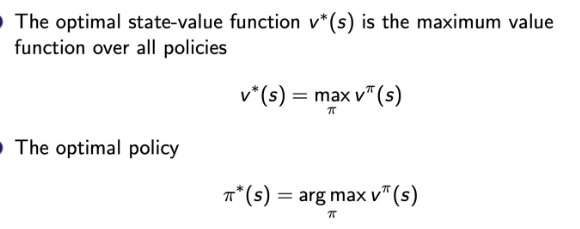
    - 最优价值唯一，但最优策略可能有多个
    - 最优策略怎么找？通过极大化Q
    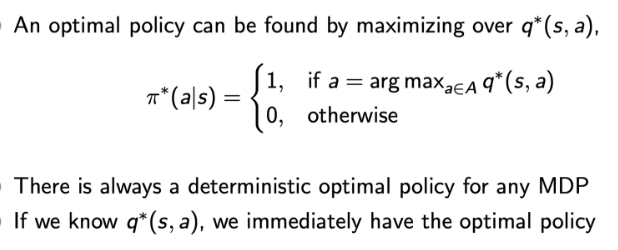

- 求解思路：根据$V^*$，找到对应的$Q^*$，进而找到最优的$\pi^*$，搜索最佳策略的方法有3种：
1. 穷举：共有$|A|^{|S|}$种可能的policy
1. policy iteration分为两步
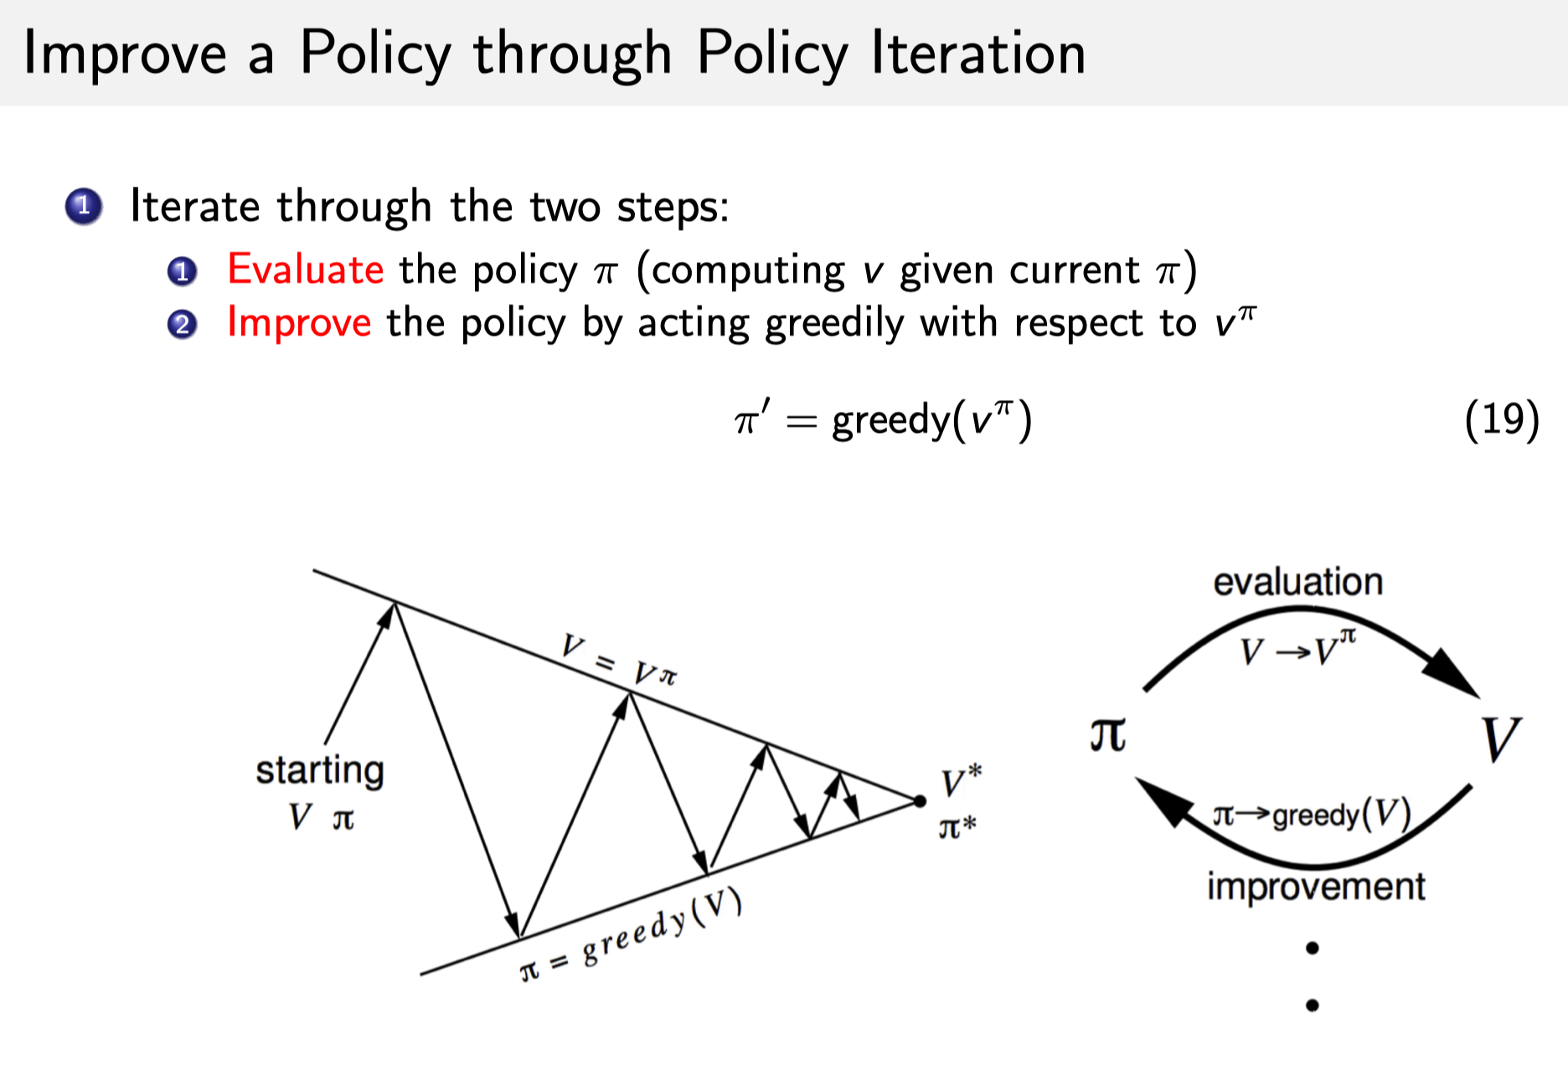
    - policy evaluation即给定policy求价值函数V
    - policy improvement即给定V，计算Q（可以理解为q-table），选择action（某一行），使Q取到极大值
    - 得到这个action之后，形成了一个新的policy，再进行第一步评估这个策略的价值
    
2. value iteration
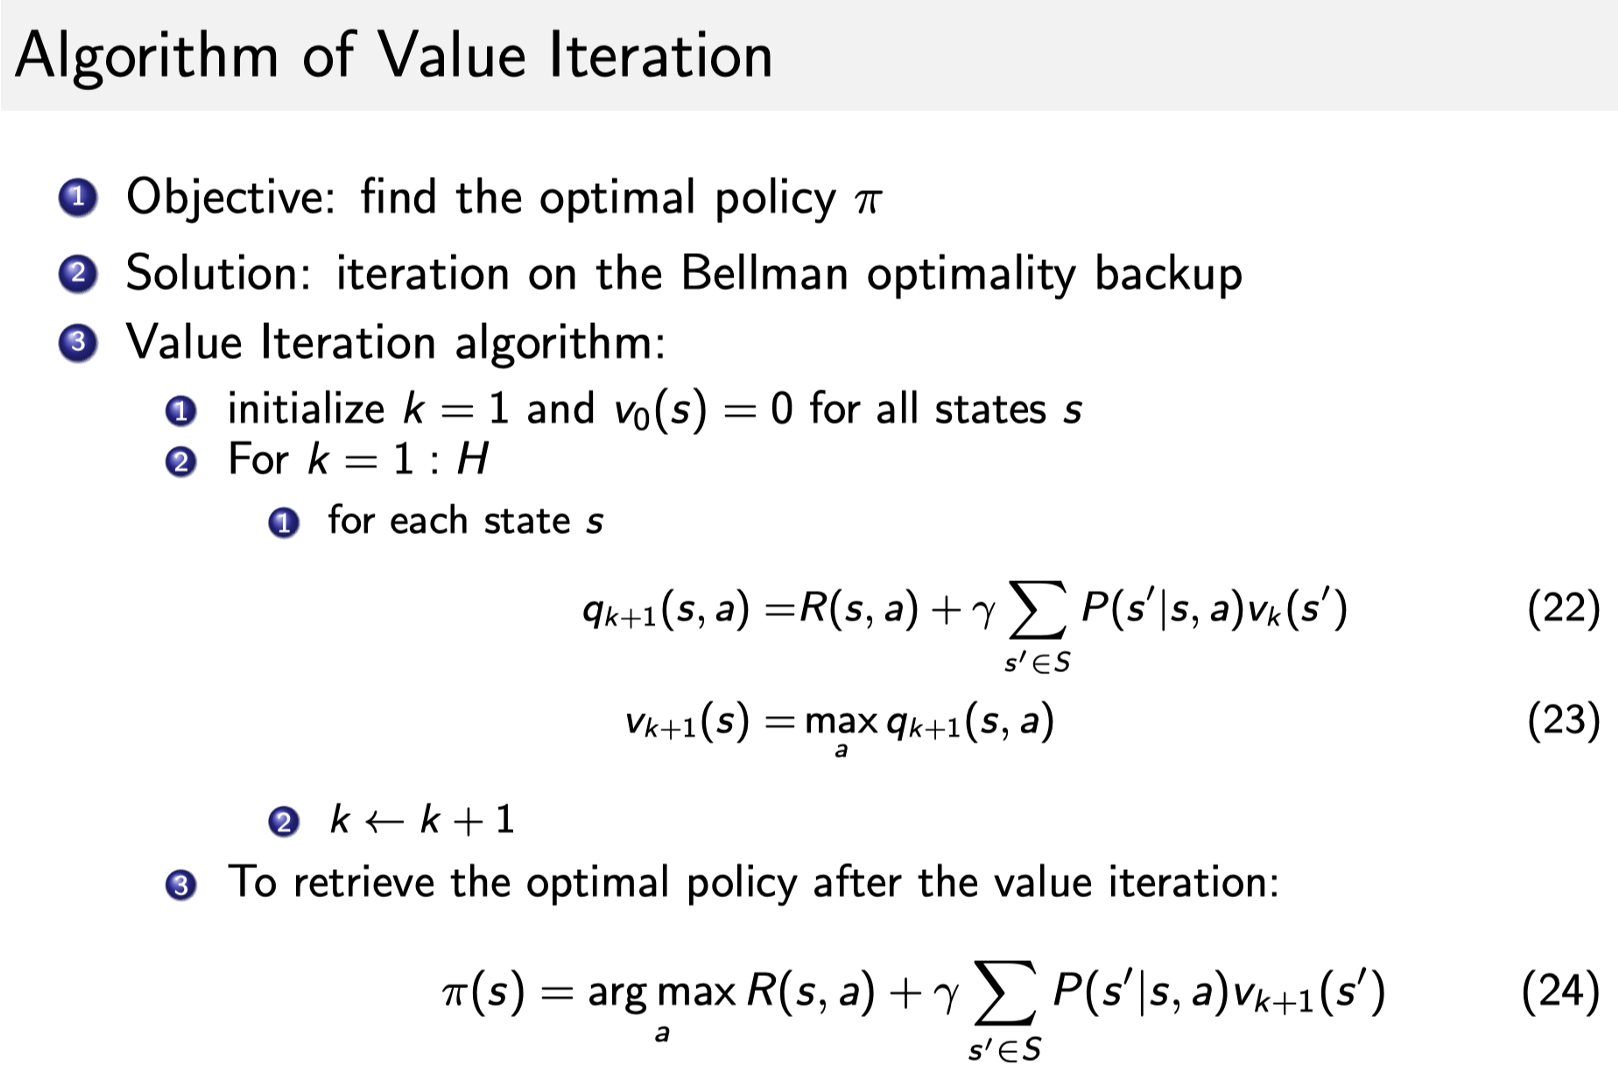
    - 对贝尔曼最优方程不断迭代，得到$v^\star$
    $$v(s)\leftarrow max_{a\in A}(R(s,a)+\gamma \sum_{s' \in S}P(s'|s,a)v(s'))$$
    - 得到$V^*$后，根据argmax选择action得到对应的Q和action sequence

3. 比较policy iteration和value iteration
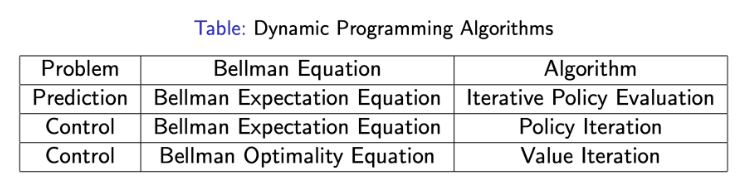
- policy iteration不断交替迭代V和policy，两者不断改进
- value iteration首先把V迭代到最优，再找到对应的最优policy

## 5. Bellman Optimality Equation

- 反应了在最佳策略下，一个状态的价值必须等于在这个状态下采取最好动作得到的回报的期望
$$v^\pi(s)=max_{a\in A} q^\pi(s,a)$$
- 由此推导得到前后时刻的Q函数的转移，用于Q-learning
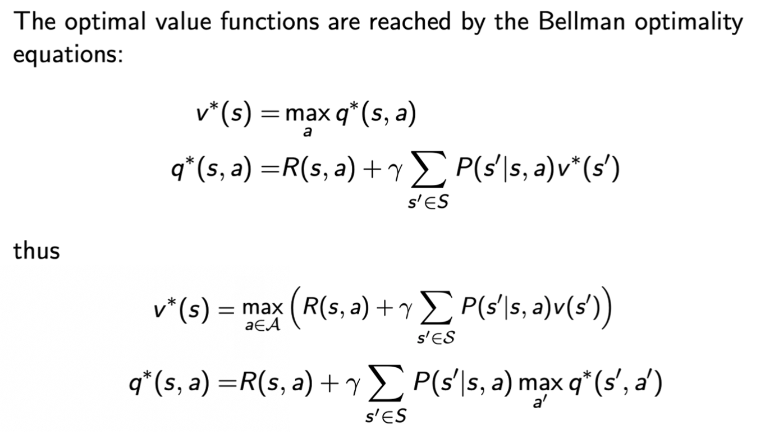